In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/file.csv')

In [ ]:
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [ ]:
df['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
class_0 = df[df["labels"] == "neutral"]
class_1 = df[df["labels"] == "good"]
class_neg = df[df["labels"] == "bad"]
class_neg  = class_neg.iloc[:56000]
df = pd.concat([class_neg , class_0 , class_1])

df.head()

,Unnamed: 0,tweets,labels
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
6,6,"As of 2 minutes ago, @OpenAI released their ne...",bad
10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,bad
17,17,#ai Models are set to become the search engine...,bad
39,39,Google is done.\n\nCompare the quality of thes...,bad


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import re

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False

    return True

def clean_dataset(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\\n', ' ', text)
    text = re.sub(r"\s*#\S+", "", text)
    text = re.sub(r"\s*@\S+", "", text)
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]

    words = [lem.lemmatize(word) for word in words]


    words = [w for w in words if not w in stop_words]
    text = " ".join(words)

    return text.strip()

df.insert(len(df.columns)-1, "cleaned_tweets", df['tweets'].apply(clean_dataset))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,tweets,cleaned_tweets,labels
4,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
6,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad
17,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad
39,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad


In [ ]:
df.describe()

,Unnamed: 0
count,167498.000000
mean,92000.440889
std,60364.984279
min,0.000000
25%,41874.250000
50%,83748.500000
75%,136924.000000
max,219293.000000


In [ ]:
df.isnull().sum()


Unnamed: 0        0
tweets            0
cleaned_tweets    0
labels            0
dtype: int64

In [ ]:
df[df.duplicated()]

,Unnamed: 0,tweets,cleaned_tweets,labels


In [ ]:
df['labels'].value_counts(normalize = True)

good       0.334398
bad        0.334332
neutral    0.331270
Name: labels, dtype: float64

In [ ]:
sent_counts = df['labels'].value_counts()
sent_counts

good       56011
bad        56000
neutral    55487
Name: labels, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3bbfe114b0>,
 [Text(-0.9544622776436864, 0.5468105344223232, 'good'),
  Text(0.010810832693568508, -1.099946874124597, 'bad'),
  Text(0.9490421105102687, 0.5561646091565114, 'neutral')])

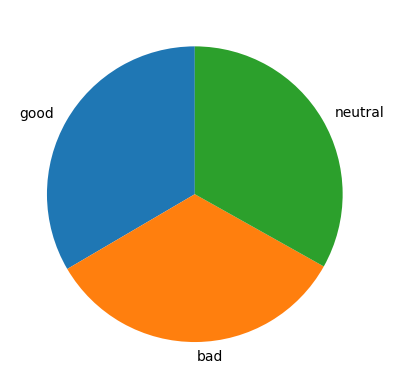

In [ ]:
plt.pie(sent_counts,labels=sent_counts.index,startangle=90)

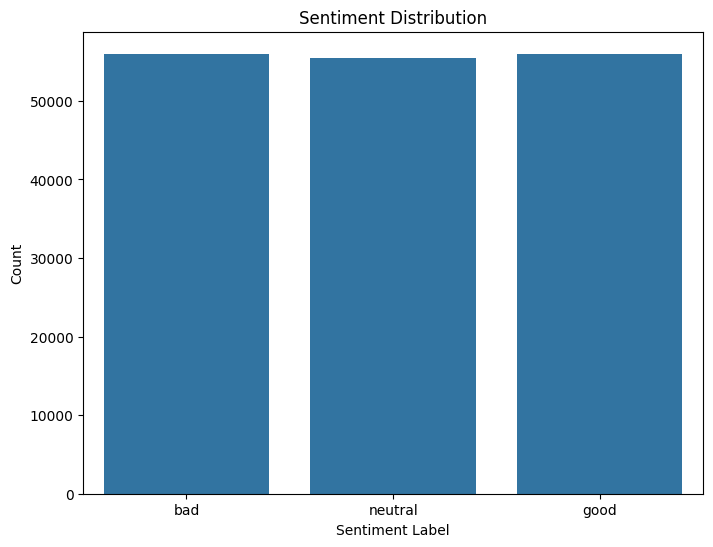

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='labels', data=df)
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment Label")
ax.set_ylabel("Count")
plt.show()

In [ ]:
df['length'] = df['cleaned_tweets'].apply(lambda x: len(x))

In [ ]:
df.head()

,Unnamed: 0,tweets,cleaned_tweets,labels,length
4,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,41
6,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,41
10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad,35
17,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad,62
39,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad,44


In [ ]:
import string

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


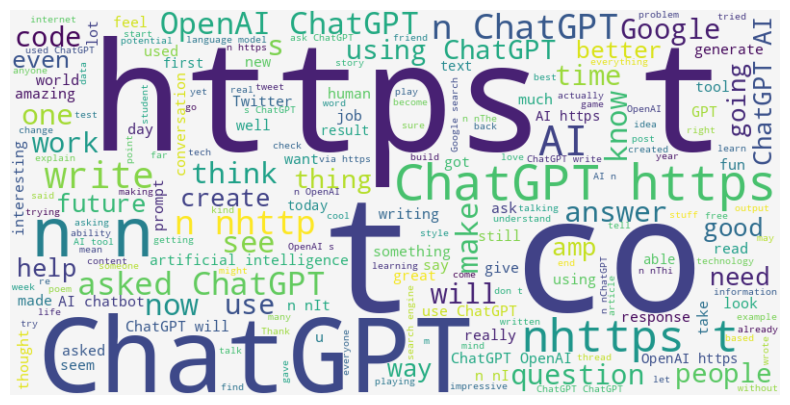

In [ ]:
from wordcloud import WordCloud

text_data = df['tweets'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Tokenize the input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["cleaned_tweets"])


# Pad the sequences to a fixed length
max_len = df['length'].max()

KeyError: 'length'

In [ ]:
max_len

264

In [ ]:
df

,Unnamed: 0,tweets,cleaned_tweets,labels,length
4,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,41
6,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,41
10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad,35
17,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad,62
39,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad,44
...,...,...,...,...,...
219278,219278,Take a moment to read this great article: Chat...,take moment read great article chatgpt lends h...,good,74
219283,219283,.@DataChaz: If you're looking for awesome #Cha...,looking awesome prompt idea check resource,good,42
219286,219286,There's now an open source alternative to Chat...,open source alternative chatgpt good luck runn...,good,53
219287,219287,One of my new favorite thing to do with #ChatG...,one new favorite thing create playlist quick e...,good,135


In [ ]:
def convert_text_to_numerical(text):
    num_words = 7000
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)

    maxlen = 140


    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    pad_seqs_todrop = []
    for i, p in enumerate(pad_seqs):
        if sum(p) == sum(sorted(p, reverse=True)[0:2]):
            pad_seqs_todrop.append(i)

    return pad_seqs, pad_seqs_todrop, tokenizer, num_words, maxlen


df.reset_index(drop=True, inplace=True)

numeric_tweets, rows_todrop, tokenizer, num_words, maxlen = convert_text_to_numerical(df['cleaned_tweets'])
df.insert(len(df.columns)-1, "numeric_tweets", numeric_tweets.tolist())
df.head()

,Unnamed: 0,tweets,cleaned_tweets,labels,numeric_tweets,length
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",35
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",62
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44


In [ ]:
label_encoder = LabelEncoder()
df.insert(len(df.columns), "encoded_labels", label_encoder.fit_transform(df['labels']))
print(label_encoder.classes_)
df.head()

['bad' 'good' 'neutral']


,Unnamed: 0,tweets,cleaned_tweets,labels,numeric_tweets,length,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41,0
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",35,0
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",62,0
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44,0


In [ ]:
print("Original Label -> Encoded Label:")
for original_label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_label} -> {encoded_label}")

Original Label -> Encoded Label:
bad -> 0
good -> 1
neutral -> 2


df

In [ ]:
data = df.drop(rows_todrop, inplace=False)
print(len(df), len(data))
data

167498 155711


,Unnamed: 0,tweets,cleaned_tweets,labels,numeric_tweets,length,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41,0
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",35,0
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",62,0
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44,0
...,...,...,...,...,...,...,...
167493,219278,Take a moment to read this great article: Chat...,take moment read great article chatgpt lends h...,good,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",74,1
167494,219283,.@DataChaz: If you're looking for awesome #Cha...,looking awesome prompt idea check resource,good,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42,1
167495,219286,There's now an open source alternative to Chat...,open source alternative chatgpt good luck runn...,good,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",53,1
167496,219287,One of my new favorite thing to do with #ChatG...,one new favorite thing create playlist quick e...,good,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",135,1


In [ ]:
len(tokenizer.word_index)

47811

In [ ]:
tokenizer.word_index

{'chatgpt': 1,
 'ai': 2,
 'like': 3,
 'write': 4,
 'new': 5,
 'ha': 6,
 'asked': 7,
 'wa': 8,
 'google': 9,
 'use': 10,
 'using': 11,
 'answer': 12,
 'good': 13,
 'question': 14,
 'openai': 15,
 'time': 16,
 'get': 17,
 'make': 18,
 'one': 19,
 'code': 20,
 'know': 21,
 'thing': 22,
 'think': 23,
 'human': 24,
 'people': 25,
 'see': 26,
 'could': 27,
 'way': 28,
 'would': 29,
 'amp': 30,
 'work': 31,
 'tool': 32,
 'chatbot': 33,
 'better': 34,
 'model': 35,
 'day': 36,
 'doe': 37,
 'need': 38,
 'writing': 39,
 'search': 40,
 'language': 41,
 'world': 42,
 'help': 43,
 'going': 44,
 'year': 45,
 'really': 46,
 'ask': 47,
 'even': 48,
 'future': 49,
 'prompt': 50,
 'via': 51,
 'intelligence': 52,
 'bot': 53,
 'first': 54,
 'used': 55,
 'job': 56,
 'story': 57,
 'much': 58,
 'say': 59,
 'create': 60,
 'great': 61,
 'u': 62,
 'take': 63,
 'artificial': 64,
 'well': 65,
 'also': 66,
 'still': 67,
 'give': 68,
 'got': 69,
 'content': 70,
 'amazing': 71,
 'best': 72,
 'text': 73,
 'response':

In [ ]:
tokenizer.word_counts

OrderedDict([('minute', 1076),
             ('ago', 792),
             ('released', 862),
             ('new', 10834),
             ('chatgpt', 118750),
             ('use', 8670),
             ('right', 3103),
             ('god', 688),
             ('damn', 488),
             ('stop', 897),
             ('announcing', 21),
             ('thing', 7082),
             ('busy', 182),
             ('model', 5068),
             ('set', 835),
             ('become', 1521),
             ('search', 4742),
             ('engine', 1537),
             ('future', 4446),
             ('atm', 40),
             ('still', 3513),
             ('struggle', 175),
             ('based', 2172),
             ('google', 9083),
             ('done', 1319),
             ('compare', 278),
             ('quality', 657),
             ('response', 3364),
             ('riddle', 95),
             ('openai', 8062),
             ('available', 620),
             ('test', 1991),
             ('give', 3491),
          

In [ ]:
from sklearn.model_selection import train_test_split
X = data['numeric_tweets']
y = data['encoded_labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [ ]:
data.head()

,Unnamed: 0,tweets,cleaned_tweets,labels,numeric_tweets,length,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41,0
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",35,0
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",62,0
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44,0


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
167493    1
167494    1
167495    1
167496    1
167497    1
Name: encoded_labels, Length: 155711, dtype: int64

In [ ]:
X_train = np.asarray(X_train.tolist())
X_train = X_train.astype(np.int32)
X_test = np.asarray(X_test.tolist()).astype(np.int32)
y_train = np.asarray(y_train.tolist()).astype(np.int32)
y_test = np.asarray(y_test.tolist()).astype(np.int32)
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[   0,    0,    0, ...,  270,  121,   16],
       [   0,    0,    0, ...,  215,   87,  216],
       [   0,    0,    0, ..., 2038,  334, 1747],
       ...,
       [   0,    0,    0, ...,  494,  407, 2762],
       [   0,    0,    0, ...,  593,  589, 3791],
       [   0,    0,    0, ...,   65,  152,   32]], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words,output_dim=128, input_length=maxlen , trainable = True))
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_classes = 3
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=1024, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

Epoch 1/10
110/110 [==============================] - 310s 3s/step - loss: 0.7773 - accuracy: 0.6452 - val_loss: 0.4782 - val_accuracy: 0.8285
Epoch 2/10
110/110 [==============================] - 303s 3s/step - loss: 0.4214 - accuracy: 0.8550 - val_loss: 0.4027 - val_accuracy: 0.8659
Epoch 3/10
110/110 [==============================] - 302s 3s/step - loss: 0.3566 - accuracy: 0.8815 - val_loss: 0.3754 - val_accuracy: 0.8777
Epoch 4/10
110/110 [==============================] - 301s 3s/step - loss: 0.3218 - accuracy: 0.8953 - val_loss: 0.3573 - val_accuracy: 0.8834
Epoch 5/10
110/110 [==============================] - 303s 3s/step - loss: 0.3006 - accuracy: 0.9033 - val_loss: 0.3523 - val_accuracy: 0.8858
Epoch 6/10
110/110 [==============================] - 299s 3s/step - loss: 0.2849 - accuracy: 0.9089 - val_loss: 0.3460 - val_accuracy: 0.8872
Epoch 7/10
110/110 [==============================] - 298s 3s/step - loss: 0.2722 - accuracy: 0.9135 - val_loss: 0.3465 - val_accuracy: 0.8887

In [ ]:
X_train.shape

(124568, 140)

In [ ]:
y_train.shape

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

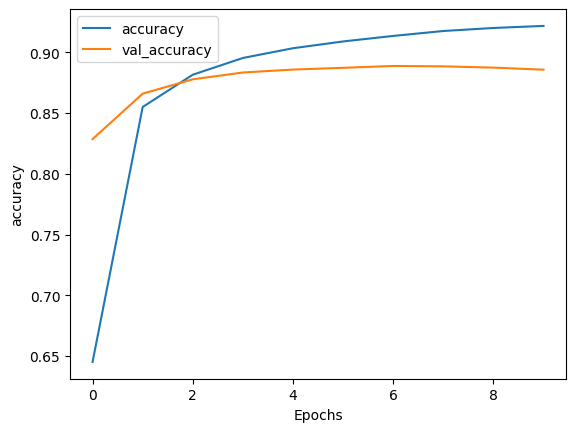

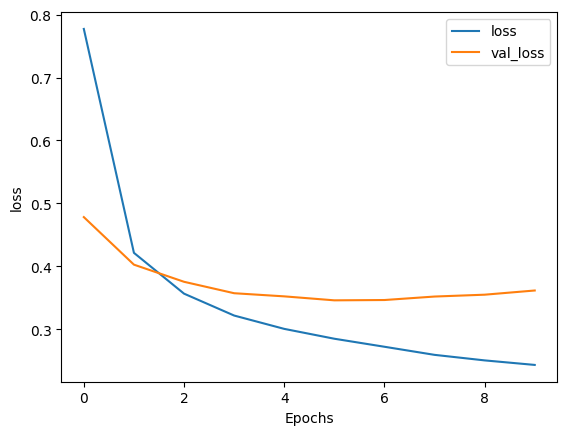

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
x = df['cleaned_tweets']
y = df['encoded_labels']
x=cv.fit_transform(x)
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
log=LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log.score(x_test,y_test)


0.866089552238806

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = log.predict(x_test)
y_pred


array([1, 2, 0, ..., 2, 2, 1])

In [ ]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.866089552238806

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.54

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
y_pred3= svm.predict(x_test)
score = accuracy_score(y_test, y_pred3)
score
svm.score(x_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred5 = rf.predict(x_test)
score = accuracy_score(y_test, y_pred5)
score

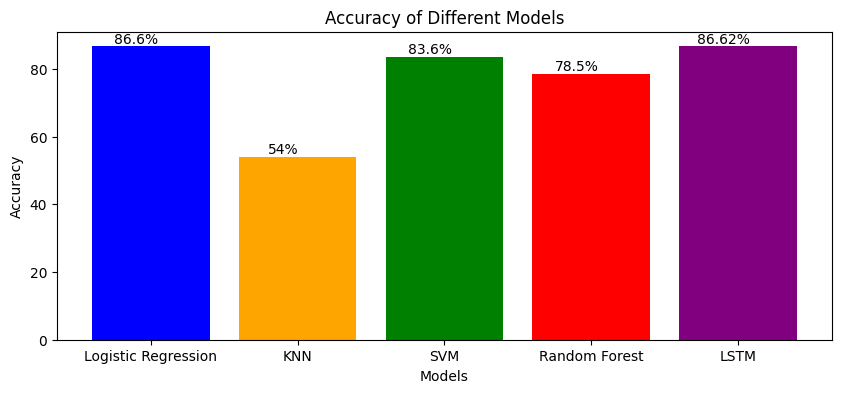

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'LSTM']
accuracies = [86.6, 54, 83.6, 78.5, 86.62]

plt.figure(figsize=(10, 4))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Adding text annotations on top of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
             bar.get_height() + 1,
             f'{acc}%',
             ha='center',
             color='black')

plt.show()


In [ ]:
def predict_user_input(tweets , model):
    data = pd.DataFrame({ 'Tweets': tweets })
    cleaned_data = data['Tweets'].apply(clean_dataset)
    sequences = tokenizer.texts_to_sequences(cleaned_data)
    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    predicted_labels = model.predict(pad_seqs)
    data['labels'] = [ label_encoder.classes_[label_num] for label_num in np.argmax(predicted_labels, axis=1)]
    #print(data)
    return predicted_labels, data

print(predict_user_input([
    'L&T is very crazy',
    'woooow, L&T company is really impressive !!!',
    "good results"] , model))

print("")

1/1 [==============================] - 0s 295ms/step
(array([[9.9017489e-01, 8.9772634e-04, 8.9274170e-03],
       [1.9061888e-02, 9.0738153e-01, 7.3556669e-02],
       [9.9897264e-03, 1.0136688e-02, 9.7987366e-01]], dtype=float32),                                          Tweets   labels
0                             L&T is very crazy      bad
1  woooow, L&T company is really impressive !!!     good
2                                  good results  neutral)



In [ ]:
def userIn(model):
    x=input("enter sentence or x for exit: ")
    while x != "x":
        predict_user_input([x] , model)
        x=input("enter sentence or x for exit: ")

userIn(model)